In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


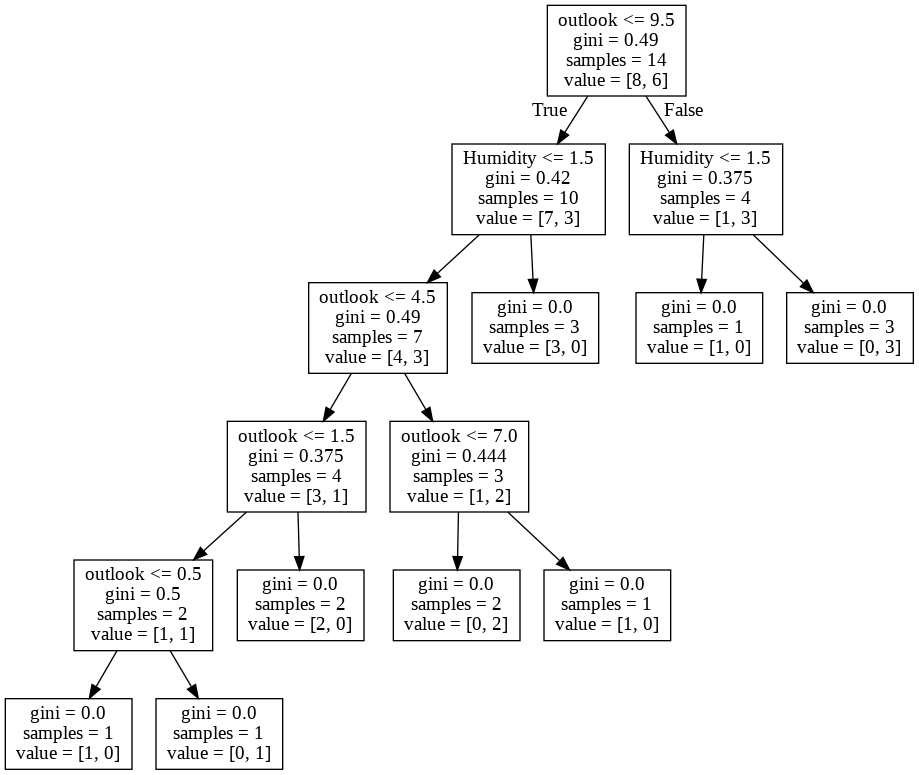

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data

data = pd.read_csv('/content/gdrive/My Drive/dataset/Outlook.csv')
feature_names = ['outlook', 'Temp', 'Humidity' , 'windy']

outlook = data.iloc[:,0].values
Temp = data.iloc[:,1].values
Humidity = data.iloc[:,2].values
Windy = data.iloc[:,3].values
play = data.iloc[:,4].values

le = preprocessing.LabelEncoder()
outlook = le.fit_transform(outlook)
Temp = le.fit_transform(Temp)
Humidity = le.fit_transform(Humidity)
Windy = le.fit_transform(Windy)
label = le.fit_transform(play)

features = list(zip(outlook, Temp, Humidity, Windy))

model = DecisionTreeClassifier(criterion = 'gini')
model.fit(features, label)

dot_data = StringIO()

export_graphviz(model, out_file=dot_data, feature_names = feature_names)

(graph, ) = graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())